<a href="https://colab.research.google.com/github/joseluiz1990/joseluiz1990/blob/main/ED_Prova02_rev08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ESTRUTURA DE DADOS - TRABALHO FINAL - PROVA 02**
# **Alunos:**
* José Luiz Lopes
* Paloma Taboada
# **Prof. Dr. Humberto A. P. Zanetti**
# Fatec Deputado Ary Fossen - Jundiaí

# Instruções
## 1) Objetivo do projeto:
Desenvolver um sistema em Python utilizando Programação Orientada a Objetos (POO) que implemente uma lista simplesmente encadeada para armazenar e manipular dados provenientes de uma base de dados aberta ou de uma API pública. O sistema deverá incluir recursos de visualização gráfica, destacando o encadeamento da estrutura e o contexto dos dados armazenados.

## 2) Escolha da base de dados:
•	Os alunos devem selecionar uma base de dados aberta (ex: Kaggle, dados.gov.br, IMDb, Spotify API, PokéAPI, etc.) ou uma API pública.
### **Resposta: Foi escolhido um dataset do Kaggle relativo a monitoramento de equipamentos industriais.**

•	Devem importar pelo menos 10 registros dessa fonte para estruturar os nós da lista.
### **Resposta: Foi utilizado o dataset completo e os 10 registros são escolhidos através do método adicionar() da lista.**

•	Os dados captados devem ser significativos e conter atributos que possam ser apresentados de forma compreensível e útil (ex: nome, categoria, ano, valor, etc.)
### **Resposta: Os dados do dataset apresentam os atributos de informações de máquinas (bomba, compressor e turbina) como localização (cidade) e variáveis de funcionamento (pressão, temperatura, umidade e vibração), além do estado de falha.**

## 3) Implementação
•	Utilizar duas classes principais:
o	No
o	Lista(com os métodos necessários a sua aplicação)
### **Resposta: As classes, no() e ListaEncadeada(), foram criadas com seus atributos e métodos vistos em sala de aula e outros métodos também.**
•	O código deve ser estruturado com boas práticas de POO (encapsulamento, uso de métodos, organização do código, etc.)
### **Resposta: O código está estruturado usando Programação Orientada a Objeto (POO). Alguns MÉTODOS foram acrescentados a classe ListaEncadeada e foram implementadas FUNÇÕES para o encapsulamento de ações específicas.**
•	Prover um meio de interação com a aplicação será um diferencial!
### **Resposta: Foram criadas a função menu() e a função main() para permitir interação do usuario com o programa através de um Menu de Opções no qual a ação desejada pode ser escolhida através de algarismos e letras.**

## 4) Visualização da estrutura
•	O projeto deve incluir a representação visual da lista duplamente encadeada:
o	Pode ser com qualquer biblioteca gráfica compatível com o Google Colab.
o	A visualização deve representar os nós, seus dados principais e as ligações anterior ↔ próximo.
### **Resposta: O projeto representa um gráfico de rede visual da lista encadeadea mostrando a sequencia do número de máquinas que foram adicionados. Para a implementação foi usada a biblioteca NetworkX que foi mencionada em sala de aula. Um método foi adicionado a classe ListaEncadeada() para executar esta ação.**
•	O sistema deve salvar a imagem da visualização gerada no diretório, mostrar na célula (ou permitir download).
### **Resposta: A imagem do grafico de rede da lista encadeada é salva no diretório do Colab através de uma função salva_graf() que é chamada pelo método exibir_ntx()**

## 5) Apresentação dos dados
•	Além da visualização estrutural da lista, os alunos devem apresentar o contexto dos dados de forma clara e informativa.
o	Exemplo: se for uma lista de filmes, mostrar o título, ano e gênero; se for uma lista de cidades, exibir população, estado, etc.
•	Pode-se incluir tabelas, gráficos extras ou texto explicativo no notebook.
### **Resposta: Foi criado o método exibir_df() na classe ListaEncadeada() para exibir a tabela de informações da máquina utilizando a lista com os números de máquinas como indexador para a criação de um dataframe com as máquinas presentes na lista. Também foram criadas duas funções plot_variavel() e plot_maquinas() para apresentar gráficos com as informações das variáveis de funcionamento das máquinas da lista.**

## 6) O notebook deve conter:
•	Introdução com descrição da base de dados/API utilizada.
###**Resposta: Veja item 1 no Notebook**
•	Trecho de código para importação ou leitura dos dados.
###**Resposta: Veja itens 1 e 2 no Notebook**
•	Implementação da estrutura.
###**Resposta: Veja item 3 no Notebook**
•	Visualização gráfica da lista.
###**Resposta: Veja itens 3, 4 e 5 no Notebook**
•	Comentários explicando o que foi feito em cada parte.
###**Resposta: Os comentários estão distribuidos nos itens do notebook e também nos programas**
•	Conclusão com análise final.
###**Resposta: Veja item 6 no Notebook**












# 0) Importação das bibliotecas

* Executa a importação de bibliotecas necessárias para a implentação das estruturas e programas



In [ ]:
# 0) Importação de bibliotecas
import networkx as nx # permite a contrução de graficos de rede de elementos
import matplotlib.pyplot as plt  # permite a excução de gráficos de vários tipos
import textwrap  # permite a formação de textos
import os  # permite a interação com o sistema operacional
import csv  # permite a leitura e escrita de arquivos CSV
import pandas as pd  # permite a leitura e escrita de arquivos CSV
import numpy as np # permite a manipulação de vetores/matrizes
import kagglehub # permite uma interface com os datasets do Kaggle
from google.colab import drive # permite manipulação de drives no Colab
from google.colab import files # permite manipulação de arquivos no Colab

#**1) Introdução com descrição da base de dados/API utilizada.**

## Foi utilizado um dataset do Kaggle com informações de equipamentos industriais disponibilizado em um arquivo tipo CSV

## O dataset é uma tabela com valores com as seguintes colunas:
* Tipos de máquinas (bomba, compressor e turbina)
* Variáveis monitoradas das máquinas (temperatura, pressão, vibração, umidade)
* Localização com o nome da cidade da instalação das máquinas
* Status de ocorrência de falha máquina (0=sem falha; 1=com falha)



#**2) Trecho de código para importação ou leitura dos dados.**
## 2.1) Download do dataset do site do Kaggle e Manipulação do arquivo

* É utilizada biblioteca do Kaggle para acessar o caminho do arquivo no site
* Em seguida, usando biblioteca de OS (sistema operacional) é verificado a existencia do caminho e a montagem do nome completo do arquivo
* Depois, utilizando a biblioteca Pandas o arquivo CSV é lido e criado um Dataframe para uso no programa

In [ ]:
# 2.1) Download do dataset do site do Kaggle e manipulação de arquivo
path = kagglehub.dataset_download("dnkumars/industrial-equipment-monitoring-dataset")
print("Caminho do Dataset no Kaggle:", path)

# Se caminho existe, então:
if os.path.exists(path):
  print("Diretório existe")
  # Lista os arquivos existentes no diretório
  files_in_directory = os.listdir(path)
  print("Lista de arquivos no diretório:", files_in_directory)

  # "Pega" no nome do arquivo csv
  csv_file_name = "equipment_anomaly_data.csv"
  # Junta o nome do caminho com o nome do arquivo
  csv_file_path = os.path.join(path, csv_file_name)

  # Lê arquivo e cria o dataframe
  df_original = pd.read_csv(csv_file_path)
  print("DataFrame criado com sucesso:")
  # Mostra o cabeçalho do dataframe
  display(df_original.head())
else: # senão:
  print("Diretório NÃO existe")

Caminho do Dataset no Kaggle: /kaggle/input/industrial-equipment-monitoring-dataset
Diretório existe
Lista de arquivos no diretório: ['equipment_anomaly_data.csv']
DataFrame criado com sucesso:


,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


## 2.2) Dataframe "Original" e "Trabalho"

* Foi criada uma cópia do dataframe original para um dataframe de trabalho, com o propósito de preservar o original e dispensar a necessidade de leitura do site caso o df de trabalho seja manipulado erroneamente durante o desenvolvimento do programa

* Foi criada uma coluna chamada "machine" no df com o intuito de criar um número de máquina. Talvez isto fosse dispensável, uma vez que o índice do dataframe poderia ser utilizado.

In [ ]:
# 2.2) Cópia e Dataframe de trabalho
# Copia o df_original para df de trabalho
df = df_original.copy()

# Cria machine no df formada pelo string "machine" mais o indice das linhas do df
df["machine"] = "maquina" + df.index.astype(str)
display(df.head(5))

,temperature,pressure,vibration,humidity,equipment,location,faulty,machine
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0,maquina0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,maquina1
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0,maquina2
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,maquina3
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,maquina4


# **3) Implementação da estrutura**
## 3.1) Classes Nó e ListaEncadeada
* Nesta primeira parte da implementação da estrutura são criadas as classes Nó e ListaEncadeda com seus atributos e também os métodos necessários para o funcionamento da estrutura de lista.

* Foram aproveitadas as estruturas fundamentais das Classes e Metódos apresentados em sala de aula e algumas alterações foram implementadas:

## 3.2) Métodos da Classe ListaEncadeada
* Aqui são descritas principalmente os novos métodos que foram criados para a exibição gráfica da rede de nós e da tabela e as alterações nos métodos apresentados em aula.

* exibir_ntx - Método para exibir o grafico da rede de nós da lista
    - criado este método através de consultas nas IAs para uso da biblioteca NetworkX
    - o desafio não foi o uso da bibliteca gráfica, mas a manipulação dos valores de "dado" e "endereço" presentes na lista encadeada.

* exibir_df - Método para exibir dataframe de informações das máquinas
    - criado este método com um atributo do df de trabalho, baseado no metodo "exibir", para fazer a exibição de um dataframe com as informações das máquinas.
    - portanto, a lista encadeada é usada como um indexador para consultar o df de trabalho e criar um df para visualização detalhada das informações das máquinas guardadas na lista encadeada.

* buscar e buscar_posicao
    - alterado e/ou adicionado prints informativos
    - acrescentado o atributo dataframe nestes métodos para permitir consultar o df de trabalho e imprimir a informação completa da máquina ou da posição na lista que está sendo buscada

* exibir
    - alterado e/ou adicionado prints informativos

* quantidade:
    - alterado e/ou adicionado prints informativos

* adicionar, adicionar_inicio, adicionar_posicao
    - alterado e/ou adicionado prints informativos

* remover, remover_inicio, remover_final, remover_posicao
    - alterado e/ou adicionado prints informativos

In [ ]:
# 3) Implementação da Estrutura

# 3.1) Classe Nó
class No:
    def __init__(self, dado):
        self.dado = dado        # atributo para armazenar o dado
        self.proximo = None     # atributo para armazenar o próximo dado

# 3.2) Classe Lista Encadeada
class ListaEncadeada:
    def __init__(self):
        self.cabeca = None # atributo para armazenar o primeiro nó da lista
        self.cauda = None  # atributo para armazenar o último nó da lista

       # ***********************************************************
    # Verificar se a lista está vazia
    def esta_vazia(self):
        return self.cabeca is None # se o nó da cabeça é None, então a lista está vazia

    # ***********************************************************
    # Verificar quantidade de nós, ou seja máquinas
    def quantidade(self):  # conta quantos "endereços" estão armazenados
        contador = 0               # inicializa contador em zero
        atual = self.cabeca        # atual recebe o nó da cabeça
        while atual is not None:   # enquanto o atual não for None (fim da lista)
            contador += 1          # incrementa o contador
            atual = atual.proximo  # atualiza valor atual com o nó proximo da lista
        print('*' * 90)
        print(f'A lista tem: {contador} registros')
        print('*' * 90)
        return contador

    # ***********************************************************
    # Adicionar um dado
    def adicionar(self, dado):
        novo_no = No(dado)  # cria a instância "novo nó" com o dado passado
        print('*' * 90)
        print(f'Registro = {novo_no.dado} foi adicionado.')
        print('*' * 90)
        if self.esta_vazia():     # se a lista está vazia, então atualiza cabeça e cauda com o mesmo nó:
            self.cabeca = novo_no # atualiza a cabeça quando o primeiro nó é adicionado
            self.cauda = novo_no  # atualiza a cauda quando o primeiro nó é adicionado
        else:                     # senão:
            self.cauda.proximo = novo_no  # atualiza o valor "proximo" do nó que está armazenado na cauda com o novo nó
            self.cauda = novo_no          # atualiza a cauda com o valor do novo nó

    # ***********************************************************
    # Adicionar um dado no inicio da lista
    def adicionar_inicio(self, dado):
        novo_no = No(dado)  # cria a instância "novo nó" com o dado passado
        print('*' * 90)
        print(f'Registro = {novo_no.dado} foi adicionado no inicio.')
        print('*' * 90)
        if self.esta_vazia():       # se a lista está vazia, então atualiza cabeça e cauda com o mesmo nó:
            self.cabeca = novo_no   # atualiza a cabeça quando o primeiro nó é adicionado
            self.cauda = novo_no    # atualiza a cauda quando o primeiro nó é adicionado
        else:                       # senão:
            novo_no.proximo = self.cabeca   # altera o próximo do novo nó com o valor da cabeça
            self.cabeca = novo_no           # atualiza a cabeça com o novo nó

    # ***********************************************************
    # Adicionar um dado na posição desejada
    def adicionar_posicao(self, dado, posicao):
        novo_no = No(dado)  # cria a instância "novo nó" com o dado passado

        if posicao == 0:    # se a posição deseja é zero, então executa o método adicionar no início
            self.adicionar_inicio(dado)
            return

        atual = self.cabeca # atual recebe o nó da cabeça da lista
        contador = 0        # inicializa contador em zero
        while atual is not None and contador < posicao - 1: # enquanto o valor atual não é "vazio" e o contador não atingiu a posição desejada
            atual = atual.proximo # atualiza o atual com o valor do próximo
            contador += 1         # incrementa o contador

        print('*' * 90)
        if atual is not None:         # se o valor atual não é "vazio", então:
            novo_no.proximo = atual.proximo   # atualiza o proximo do novo nó com o valor do proximo do atual
            atual.proximo = novo_no           # atualiza o proximo do atual com o novo nó
            print(f'Registro = {novo_no.dado} foi adicionado na posição = {posicao}.')
            if novo_no.proximo is None: # se o valor do proximo novo nó é "vazio", então:
                self.cauda = novo_no  # atualiza a cauda com o valor do novo nó
        else:
            print(f'Posição = {posicao} está fora do intervalo.')
        print('*' * 90)

    # ***********************************************************
    # Buscar por um dado desejado
    def buscar(self, dataframe, dado):
        atual = self.cabeca
        while atual is not None:
            if atual.dado == dado:
                print('*' * 90)
                print(f'Registro = {atual.dado} foi encontrado.')
                msk_maquina = dataframe['machine'] == atual.dado  # cria mascara
                df_registro = dataframe[msk_maquina] # cria um df com o registro de uma maquina
                display(df_registro)
                print('*' * 90)
                return True
            atual = atual.proximo
        print('*' * 90)
        print(f'Registro = {dado} NÃO foi encontrado.')
        print('*' * 90)
        return False

    # ***********************************************************
    # Buscar por um dado em uma posição desejada
    def buscar_posicao(self, dataframe, posicao):
        atual = self.cabeca
        contador = 0

        while atual is not None and contador < posicao:
            atual = atual.proximo
            contador += 1

        print('*' * 90)
        if atual is not None:
            print(f'Na Posição = {posicao} está o Registro = {atual.dado}')
            msk_maquina = dataframe['machine'] == atual.dado  # cria mascara
            df_registro = dataframe[msk_maquina]
            display(df_registro)
        else:
            print(f'Posição = {posicao} está fora do intervalo.')
        print('*' * 90)

    # ***********************************************************
    # Remover um dado
    def remover(self, dado):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
            return

        atual = self.cabeca
        anterior = None

        # Percorre a lista para encontrar o nó a ser removido
        while atual is not None:
            if atual.dado == dado:
                # Se o nó a ser removido é o primeiro
                if anterior is None:
                    self.cabeca = atual.proximo
                else:
                    anterior.proximo = atual.proximo
                print('*' * 90)
                print(f'Registro = {dado} foi removido.')
                print('*' * 90)
                return

            anterior = atual
            atual = atual.proximo

        print('*' * 90)
        print(f'Registro = {dado} não foi encontrado.')
        print('*' * 90)

    # ***********************************************************
    # Remover o primeiro dado
    def remover_primeiro(self):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
            return

        print('*' * 90)
        print(f'Primeiro Registro = {self.cabeca.dado} foi removido.')
        print('*' * 90)

        self.cabeca = self.cabeca.proximo

        if self.cabeca is None:
            self.cauda = None  # Se a lista estiver vazia, a cauda também deve ser None

    # ***********************************************************
    # Remover o último dado
    def remover_ultimo(self):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
            return

        atual = self.cabeca
        anterior = None

        while atual.proximo is not None:
            anterior = atual
            atual = atual.proximo

        if anterior is None:
            self.cabeca = None
            self.cauda = None
        else:
            anterior.proximo = None
            self.cauda = anterior  # Atualiza a cauda para o penúltimo nó
        print('*' * 90)
        print(f'Último Registro = {atual.dado} foi removido.')
        print('*' * 90)

    # ***********************************************************
    # Remover um dado em uma posição desejada
    def remover_posicao(self, posicao):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
            return

        if posicao == 0:
            self.remover_primeiro()
            return

        atual = self.cabeca
        anterior = None
        contador = 0

        while atual is not None and contador < posicao:
            anterior = atual
            atual = atual.proximo
            contador += 1

        print('*' * 90)
        if atual is not None:
            anterior.proximo = atual.proximo
            if anterior.proximo is None:
                self.cauda = anterior  # Atualiza a cauda se o último nó foi removido
            print(f'Foi removida a Posição = {posicao} com o Registro = {atual.dado} .')
        else:
            print(f'Posição = {posicao} está fora do intervalo.')
        print('*' * 90)

 # ***********************************************************
    # Exibir todos os elementos da lista
    def exibir(self):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
        else:
            atual = self.cabeca # atual recebe o endereço da cabeça
            print('*' * 90)
            print('LISTA DOS NÚMEROS DAS MÁQUINAS:')
            print('*' * 90)
            while atual: # enquanto atual possuir um endereço válido
                print(atual.dado, end='\n') # imprime o valor do dado atual
                atual = atual.proximo # atualiza valor atual com o endereço do proximo
            print('*' * 90)

# ***********************************************************
    # Exibir a rede com todos os elementos da lista
    def exibir_ntx(self):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
        else:
            print('*' * 90)
            print('GRÁFICO DA REDE DA LISTA DE MÁQUINAS')
            print('*' * 90)
            atual = self.cabeca
            G = nx.Graph()
            # Lista para armazenar os nomes das máquinas a serem usadas como nós
            nodos = []
            while atual:
                primeiro = atual.dado # Usa o dado diretamente se não for um DataFrame ou se o DataFrame for vazio
                nodos.append(primeiro)
                atual = atual.proximo

            # Adiciona os nodos ao grafo
            G.add_nodes_from(nodos)

            # Adiciona as arestas entre nós adjacentes na lista encadeada
            atual = self.cabeca
            while atual and atual.proximo:
                 primeiro_nodo = atual.dado
                 segundo_nodo = atual.proximo.dado # Melhor usar o próprio dado

                 # Adiciona a aresta apenas se ambos os nós puderem ser representados
                 if primeiro_nodo is not None and segundo_nodo is not None:
                     # Garante que ambos os nós existem no grafo antes de adicionar a aresta
                     if primeiro_nodo in G.nodes() and segundo_nodo in G.nodes():
                        G.add_edge(primeiro_nodo, segundo_nodo)

                 atual = atual.proximo

            nx.draw(G, with_labels=True, node_color='lightblue', arrows=True)
            plt.title('Rede da Lista de Máquinas')
            salva_graf()
            plt.show()
            print('*' * 90)

    # ***********************************************************
    # Exibir a tabela com as informações das máquinas
    def exibir_df(self,dataframe):
        if self.esta_vazia():
            print('*' * 90)
            print('A LISTA ESTÁ VAZIA')
            print('*' * 90)
        else:
            atual = self.cabeca
            print('*' * 90)
            print('TABELA DE INFORMAÇÕES DAS MÁQUINAS:')
            print('*' * 90)
            df_maquinas = pd.DataFrame()
            while atual:
                msk_maquina = dataframe['machine'] == atual.dado  # cria mascara
                df_registro = dataframe[msk_maquina]
                df_maquinas = pd.concat([df_maquinas, df_registro])
                atual = atual.proximo
            display(df_maquinas)
            print('*' * 90)
        return df_maquinas

## 3.3) Executa a criação da instância (objeto) Lista
* Cria Instância "lista" com base na Classe ListaEncadeada


In [ ]:
# 3) Implementação da estrutura.
# 3.3) Cria Instância "lista" com base na Classe ListaEncadeada
lista = ListaEncadeada()

# **4) Implementação PPO**

## 4.1) Funções Principal e outras

Nesta parte da implementação da estrutura são descritas funções para atender ao requisito de uso de POO para encapsulamento e organização de códigos.

### Função main()
* executa a chamada dos métodos de gerenciamento da lista, métodos de exibição dos gráficos de variáveis e de salvamento do grafico da rede, dependendo da opção selecionada no Menu de comandos

### Função menu()
* executa a visualização de um menu de opções de comando de uma maneira "mais amigável" para o usuário.
* implementada com o uso da biblioteca "textwrap" para formatação de textos

### Funções nu_maquina() e nu_posicao()
* executam a entrada de dados (parametros) de número de maquina e numero da posição desejados para os atributos dos métodos de gerenciamento da lista
* as funções foram criadas devido a necessidade de uso repetido e auxiliam a implementação de um código mais limpo.

### Função salva_graf()
* executa o salvamento do gráfico da rede no diretório "content" do Colab

### Função plot_variavel()
* Plota bargraph de cada variável de funcionamento individualmente das máquinas

### Função plot_maquinas()
* Plota bargraph das 4 variaveis de funcionamento das máquinas

In [ ]:
# 4) Implementação PPO
# 4.1) Funções Principal e outras

#*******************************************************************************
# função Menu de Comandos
def menu():
    menu = """\n
    ======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
    =======            MENU DE COMANDOS          =======
    ====================================================
    [1]\tAdicionar Máquina
    [2]\tAdicionar no início
    [3]\tAdicionar na posição
    [4]\tRemover Máquina
    [5]\tRemover do início
    [6]\tRemover do final
    [7]\tRemover da posição
    [8]\tBuscar Máquina
    [9]\tBuscar na posição
    [q]\tExibir quantidade de máquinas
    [n]\tExibir lista dos números das máquinas
    [l]\tExibir tabela das informações das máquinas
    [g]\tExibir gráfico da rede da lista de máquinas
    [m]\tExibir gráfico das máquinas
    [p]\tExibir gráfico "Pressão"
    [t]\tExibir gráfico "Temperatura"
    [u]\tExibir gráfico "Umidade"
    [v]\tExibir gráfico "Vibração"
    [x]\tSair
    => """
    return input(textwrap.dedent(menu))

#*******************************************************************************
# Função entrada do numero da máquina
def nu_maquina():
    numero = input("Digite o numero da máquina: ")
    machine = "maquina"+numero
    return machine

#*******************************************************************************
# Função entrada da posição na lista
def nu_posicao():
    position = int(input("Digite a posição na lista: "))
    return position

#*******************************************************************************
# Função salvar e fazer download de grafico
def salva_graf():
    # Salvar a figura
    plt.savefig("grafico.png")
    print("Gráfico salvo no Google Colab!")

#*******************************************************************************
# Função plota bargraph das variaveis das máquinas
def plot_maquinas(df_maquinas):
    # Dados
    maquinas = df_maquinas["machine"]
    variaveis = ["pressure", "temperature", "humidity", "vibration"]
    valores = df_maquinas[variaveis].values.T  # Transpor para facilitar o plot

    # Posições das barras
    x = np.arange(len(maquinas))
    largura = 0.2  # Largura das barras

    # Plotar
    plt.figure(figsize=(12, 6))
    for i, (var, vals) in enumerate(zip(variaveis, valores)):
        plt.bar(x + i * largura, vals, width=largura, label=var)

    plt.xlabel("Máquina")
    plt.ylabel("Valor")
    plt.title("Variáveis por Máquina")
    plt.xticks(rotation=90)
    plt.xticks(x + largura * 1.5, maquinas)

    plt.legend()
    print('-' * 90)
    print("VISUALIZAÇÃO DOS DADOS: HISTOGRAMA ")
    print('-' * 90)
    plt.show()

#*******************************************************************************
# Função plota bargraph de cada variável da máquina
def plot_variavel(df_maquinas,variable):
    # alterar data frame Ctaegorias por ordem descrescente de Vendas por Produto
    df_maquinas= df_maquinas.sort_values(by=variable, ascending=False)

    # "transforma" as colunas do dataframe em séries
    variavel = df_maquinas[variable]
    maquina = df_maquinas['machine']

    # destacar o maior e menor valor do grafico de barras
    max_index = variavel.idxmax()
    min_index = variavel.idxmin()

    # plotar tamanho do grafico
    plt.figure(figsize=(10, 6))

    # plotar gráfico de barras
    plt.bar(maquina, variavel, color='skyblue')

    # plotar anotações de maior e menor
    plt.annotate(f'Maior: {maquina[max_index]} - {variavel[max_index]:.2f}', xy=(maquina[max_index], variavel[max_index]))
    plt.annotate(f'Menor: {maquina[min_index]} - {variavel[min_index]:.2f}', xy=(maquina[min_index], variavel[min_index]))

    # plotar mudança de cor a barra do produto mais vendido e do menos vendido
    plt.bar(maquina[max_index], variavel[max_index], color='green')
    plt.bar(maquina[min_index], variavel[min_index], color='red')

    # plotar legendas do grafico
    plt.ylabel(variable)
    plt.xlabel('machine')
    plt.title(variable+' X machines')

    # plotar sticks
    plt.xticks(rotation=90) # rotaciona os rótulos do eixo x em G graus
    plt.xticks(maquina) #

    print('-' * 90)
    print("VISUALIZAÇÃO DOS DADOS: HISTOGRAMA ")
    print('-' * 90)
    # plotar grafico
    plt.show()

#*******************************************************************************
# Função Principal
def main():

    # "Chama" função Menu de opções de comando de operações
    opcao = menu()

    # "Loop" de :
    # verificação de qual opção de comando foi solicitada e de
    # "chamada" dos métodos de "gerenciamento" da lista encadeada
    while opcao != "x":

        if opcao == "1":
            maquina = nu_maquina()
            lista.adicionar(maquina)

        elif opcao == "2":
            maquina = nu_maquina()
            lista.adicionar_inicio(maquina)

        elif opcao == "3":
            maquina = nu_maquina()
            posicao = nu_posicao()
            lista.adicionar_posicao(maquina,posicao)

        elif opcao == "4":
            maquina = nu_maquina()
            lista.remover(maquina)

        elif opcao == "5":
            lista.remover_primeiro()

        elif opcao == "6":
            lista.remover_ultimo()

        elif opcao == "7":
            posicao = nu_posicao()
            lista.remover_posicao(posicao)

        elif opcao == "8":
            maquina = nu_maquina()
            lista.buscar(df,maquina)

        elif opcao == "9":
            posicao = nu_posicao()
            lista.buscar_posicao(df,posicao)

        elif opcao == "q":
            lista.quantidade()

        elif opcao == "n":
            lista.exibir()

        elif opcao == "l":
            df_maquinas=lista.exibir_df(df)

        elif opcao == "g":
            lista.exibir_ntx()

        elif opcao == "m":
            df_maquinas=lista.exibir_df(df)
            plot_maquinas(df_maquinas)

        elif opcao == "p":
            df_maquinas=lista.exibir_df(df)
            plot_variavel(df_maquinas,"pressure")

        elif opcao == "t":
            df_maquinas=lista.exibir_df(df)
            plot_variavel(df_maquinas,"temperature")

        elif opcao == "u":
            df_maquinas=lista.exibir_df(df)
            plot_variavel(df_maquinas,"humidity")

        elif opcao == "v":
            df_maquinas=lista.exibir_df(df)
            plot_variavel(df_maquinas,"vibration")

        else:
            print("\n@@@ Operação inválida, por favor selecione novamente a operação desejada. @@@")

        # "Chama" função Menu de opções de comando de operações
        opcao = menu()


# *5) Execução do Programa*
## 5.1) Executa o programa principal

* O programa principal main() é uma função que orquestra a chamada e execução dos métodos da classe Lista Encadeada e também de outras funções de exibição de graáficos das máquinas tornando o programa organizado e estruturado e fazendo uso do conceito POO.

* Para atender aos requisitos do trabalho de visualizar e salvar a imagem da representação dos nós foi implementada a opção "g" no menu de comandos que  chama o método exibir_ntx() da Lista Encadeada que visualiza a estrutura da rede, este método chama a função salva_graf() que salva a imagem no arquivo /content/ do Google Colab.



======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
=======            MENU DE COMANDOS          =======
[1]	Adicionar Máquina
[2]	Adicionar no início
[3]	Adicionar na posição
[4]	Remover Máquina
[5]	Remover do início
[6]	Remover do final
[7]	Remover da posição
[8]	Buscar Máquina
[9]	Buscar na posição
[q]	Exibir quantidade de máquinas
[n]	Exibir lista dos números das máquinas
[l]	Exibir tabela das informações das máquinas
[g]	Exibir gráfico da rede da lista de máquinas
[m]	Exibir gráfico das máquinas
[p]	Exibir gráfico "Pressão"
[t]	Exibir gráfico "Temperatura"
[u]	Exibir gráfico "Umidade"
[v]	Exibir gráfico "Vibração"
[x]	Sair
=> p
******************************************************************************************
TABELA DE INFORMAÇÕES DAS MÁQUINAS:
******************************************************************************************


,temperature,pressure,vibration,humidity,equipment,location,faulty,machine
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0,maquina7
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0,maquina9
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,maquina1
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0,maquina8
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,maquina3
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,maquina4
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0,maquina6
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0,maquina5
10,53.070432,44.105203,2.071652,47.458742,Compressor,New York,0.0,maquina10


******************************************************************************************
------------------------------------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: HISTOGRAMA 
------------------------------------------------------------------------------------------


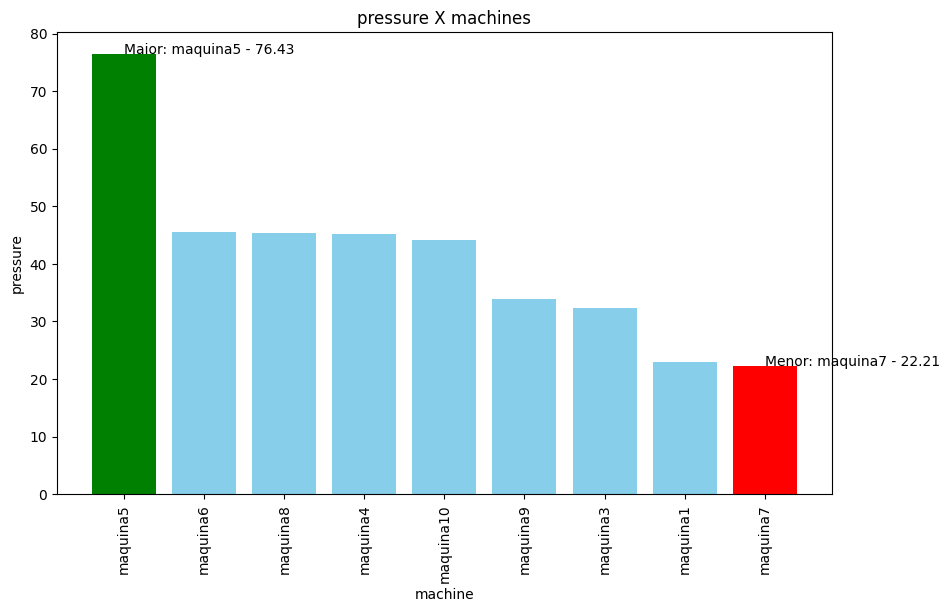



======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
=======            MENU DE COMANDOS          =======
[1]	Adicionar Máquina
[2]	Adicionar no início
[3]	Adicionar na posição
[4]	Remover Máquina
[5]	Remover do início
[6]	Remover do final
[7]	Remover da posição
[8]	Buscar Máquina
[9]	Buscar na posição
[q]	Exibir quantidade de máquinas
[n]	Exibir lista dos números das máquinas
[l]	Exibir tabela das informações das máquinas
[g]	Exibir gráfico da rede da lista de máquinas
[m]	Exibir gráfico das máquinas
[p]	Exibir gráfico "Pressão"
[t]	Exibir gráfico "Temperatura"
[u]	Exibir gráfico "Umidade"
[v]	Exibir gráfico "Vibração"
[x]	Sair
=> t
******************************************************************************************
TABELA DE INFORMAÇÕES DAS MÁQUINAS:
******************************************************************************************


,temperature,pressure,vibration,humidity,equipment,location,faulty,machine
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0,maquina7
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0,maquina9
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,maquina1
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0,maquina8
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,maquina3
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,maquina4
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0,maquina6
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0,maquina5
10,53.070432,44.105203,2.071652,47.458742,Compressor,New York,0.0,maquina10


******************************************************************************************
------------------------------------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: HISTOGRAMA 
------------------------------------------------------------------------------------------


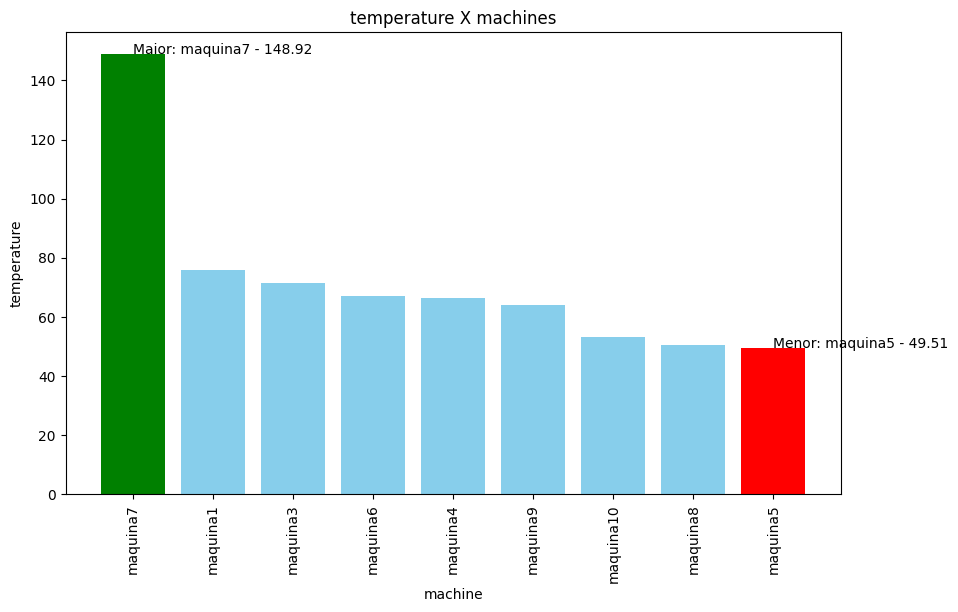



======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
=======            MENU DE COMANDOS          =======
[1]	Adicionar Máquina
[2]	Adicionar no início
[3]	Adicionar na posição
[4]	Remover Máquina
[5]	Remover do início
[6]	Remover do final
[7]	Remover da posição
[8]	Buscar Máquina
[9]	Buscar na posição
[q]	Exibir quantidade de máquinas
[n]	Exibir lista dos números das máquinas
[l]	Exibir tabela das informações das máquinas
[g]	Exibir gráfico da rede da lista de máquinas
[m]	Exibir gráfico das máquinas
[p]	Exibir gráfico "Pressão"
[t]	Exibir gráfico "Temperatura"
[u]	Exibir gráfico "Umidade"
[v]	Exibir gráfico "Vibração"
[x]	Sair
=> u
******************************************************************************************
TABELA DE INFORMAÇÕES DAS MÁQUINAS:
******************************************************************************************


,temperature,pressure,vibration,humidity,equipment,location,faulty,machine
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0,maquina7
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0,maquina9
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,maquina1
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0,maquina8
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,maquina3
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,maquina4
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0,maquina6
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0,maquina5
10,53.070432,44.105203,2.071652,47.458742,Compressor,New York,0.0,maquina10


******************************************************************************************
------------------------------------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: HISTOGRAMA 
------------------------------------------------------------------------------------------


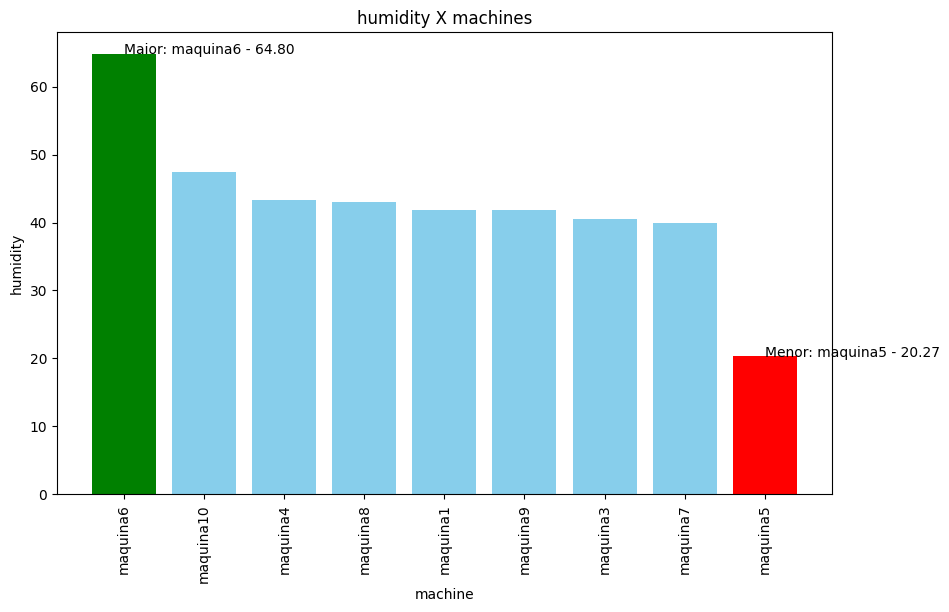



======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
=======            MENU DE COMANDOS          =======
[1]	Adicionar Máquina
[2]	Adicionar no início
[3]	Adicionar na posição
[4]	Remover Máquina
[5]	Remover do início
[6]	Remover do final
[7]	Remover da posição
[8]	Buscar Máquina
[9]	Buscar na posição
[q]	Exibir quantidade de máquinas
[n]	Exibir lista dos números das máquinas
[l]	Exibir tabela das informações das máquinas
[g]	Exibir gráfico da rede da lista de máquinas
[m]	Exibir gráfico das máquinas
[p]	Exibir gráfico "Pressão"
[t]	Exibir gráfico "Temperatura"
[u]	Exibir gráfico "Umidade"
[v]	Exibir gráfico "Vibração"
[x]	Sair
=> v
******************************************************************************************
TABELA DE INFORMAÇÕES DAS MÁQUINAS:
******************************************************************************************


,temperature,pressure,vibration,humidity,equipment,location,faulty,machine
7,148.923369,22.214121,0.109819,39.944953,Turbine,San Francisco,1.0,maquina7
9,63.886148,33.802912,1.139280,41.795515,Compressor,Atlanta,0.0,maquina9
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0,maquina1
8,50.403299,45.399899,2.231718,43.067667,Pump,Houston,0.0,maquina8
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0,maquina3
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0,maquina4
6,66.903503,45.530759,1.548345,64.804922,Compressor,Houston,0.0,maquina6
5,49.510959,76.426729,4.809298,20.269692,Compressor,New York,1.0,maquina5
10,53.070432,44.105203,2.071652,47.458742,Compressor,New York,0.0,maquina10


******************************************************************************************
------------------------------------------------------------------------------------------
VISUALIZAÇÃO DOS DADOS: HISTOGRAMA 
------------------------------------------------------------------------------------------


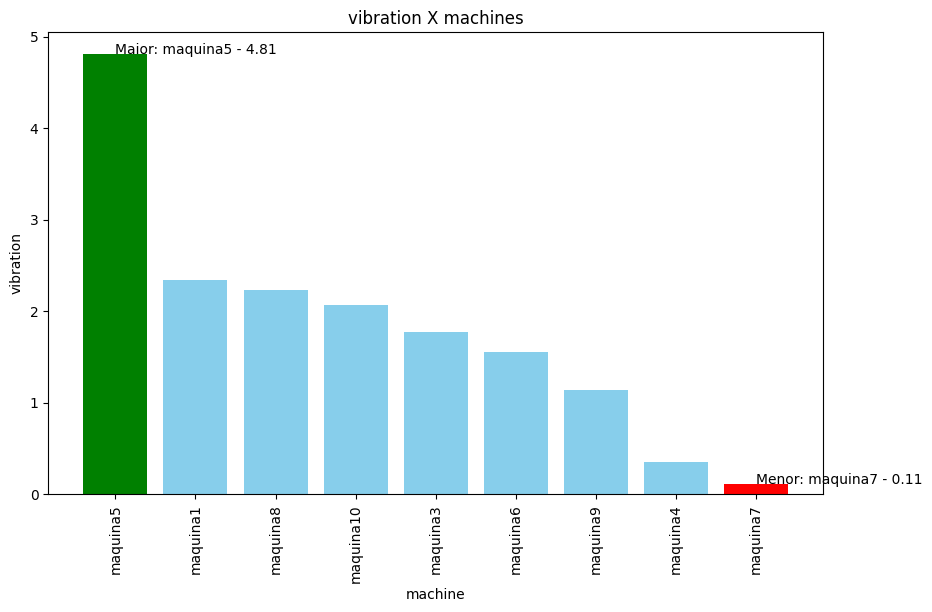



======= GERENCIAMENTO MANUTENÇÃO DE MÁQUINAS =======
=======            MENU DE COMANDOS          =======
[1]	Adicionar Máquina
[2]	Adicionar no início
[3]	Adicionar na posição
[4]	Remover Máquina
[5]	Remover do início
[6]	Remover do final
[7]	Remover da posição
[8]	Buscar Máquina
[9]	Buscar na posição
[q]	Exibir quantidade de máquinas
[n]	Exibir lista dos números das máquinas
[l]	Exibir tabela das informações das máquinas
[g]	Exibir gráfico da rede da lista de máquinas
[m]	Exibir gráfico das máquinas
[p]	Exibir gráfico "Pressão"
[t]	Exibir gráfico "Temperatura"
[u]	Exibir gráfico "Umidade"
[v]	Exibir gráfico "Vibração"
[x]	Sair
=> x


In [ ]:
111# 5) Execução do Principal
# "Chama" o Programa Principal
main()

#*6) Conclusão e Análise Final*
O projeto proposto teve como objetivo implementar uma estrutura de lista simplesmente encadeada utilizando Programação Orientada a Objetos (POO) em Python, com integração de dados reais oriundos de uma base pública e recursos de visualização gráfica. Todos os objetivos foram plenamente alcançados, demonstrando não apenas a aplicação prática dos conceitos de estrutura de dados, mas também a capacidade de integração com bibliotecas externas e organização de um sistema interativo.

A escolha de um dataset do Kaggle voltado ao monitoramento de equipamentos industriais permitiu aplicar a estrutura de lista encadeada em um contexto relevante, lidando com atributos técnicos reais como pressão, temperatura, umidade, vibração e estado de falha das máquinas. Esses dados foram organizados em nós individuais, permitindo operações clássicas da estrutura (adição, remoção, busca e exibição) de forma eficiente e encadeada.

No aspecto da **Programação Orientada a Objetos** , o projeto foi enriquecido com encapsulamento, modularização e reutilização de código, por meio da criação de métodos específicos dentro da classe ListaEncadeada, além do uso de funções auxiliares que reforçam a clareza e manutenibilidade do código. A inclusão de um menu interativo fortalece a experiência do usuário, promovendo autonomia na navegação e manipulação da lista.

A **visualização gráfica da estrutura**, implementada com a biblioteca NetworkX, foi um diferencial relevante. Representar os nós visualmente permitiu reforçar o entendimento do encadeamento lógico da estrutura, além de **cumprir a proposta de salvar e disponibilizar a imagem gerada**. Complementarmente, gráficos adicionais sobre as variáveis operacionais das máquinas enriqueceram o contexto informativo dos dados, aproximando o sistema de aplicações reais de monitoramento industrial.

**Como aspectos positivos, destacam-se:**

* A adequação técnica da estrutura de lista encadeada às operações realizadas.

* O uso eficaz de bibliotecas externas para visualização (NetworkX, Matplotlib, Pandas).

* A qualidade do encapsulamento e separação de responsabilidades no código.

* A interface interativa com o usuário por meio de menus e feedback textual.

Como oportunidade de melhoria futura, poderia-se evoluir para uma lista duplamente encadeada, adicionar persistência de dados (salvar/ler em arquivos) e implementar uma interface gráfica com o usuário (Graphical User Interface) mais avançada.

Em síntese, o trabalho demonstra domínio dos conceitos fundamentais de estruturas de dados, organização de código orientado a objetos e integração de dados reais com visualização eficaz — configurando-se como um projeto completo, funcional e alinhado às boas práticas de desenvolvimento.